In [89]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from math import sqrt
from sys import exit

def get_coord(desc, shape):
    coordinate = 0
    for i in range(len(desc)):
        if i == 0:
            coordinate += desc[len(desc)-1] / pointsize
        else:
            coordinate += (bin_per_dim**i) * (desc[len(desc)-1-i] / pointsize)
    
    return np.unravel_index(int(coordinate), shape, order='F')
    
def present_heatmap(num_dims, bin_per_dim, filename, coordsfilename = "",
                    gp_archive = False, fix_range = False, minimum = -0.5,
                    maximum = 8, num_samples = 0):
    read_coords = coordsfilename != ""

    bin_size = 1 / bin_per_dim
    pointsize = 1 / bin_per_dim
    data = np.empty(bin_per_dim ** num_dims)
    
    dimxy = int(sqrt(bin_per_dim ** num_dims))
    
    data[:] = np.nan

    # if original archive
    if not gp_archive:
        r,a,b,c,d,e,f,z,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_ = np.loadtxt(filename, unpack=True)
    # if archive from gaussian process from ite
    else:
        a,b,c,d,e,f,z,_,_ = np.loadtxt(filename, unpack=True)
    
    minscore, maxscore = 0, 0

    for i in range(len(a)):
        if gp_archive and i == 0: # avoid title in gp archives.
            continue
            
        coord = get_coord([a[i], b[i], c[i], d[i], e[i], f[i]], (dimxy, dimxy)) # 2d, must convert
        row = np.ravel_multi_index(coord, (dimxy, dimxy), order='F') # convert from 2d to 1d location
        
        data[row] = z[i]
        if z[i] > maxscore:
            maxscore = z[i]
        if z[i] < minscore:
            minscore = z[i]

    
    print("Minscore found: " + str(minscore))
    print("Maxscore found: " + str(maxscore))
    
    heat = np.reshape(data, (dimxy, dimxy))

    fig, ax = plt.subplots()

    sns.set(rc={'figure.figsize':(15,10)})


    thick_lines_pos = list(range(0,int(dimxy + dimxy/5),int(dimxy/5)))
    lines_pos = list(range(int(dimxy/(5*5)),int(dimxy),int(dimxy/(5*5))))
    thin_lines_pos = list(range(int(dimxy/(5*5*5)),int(dimxy),int(dimxy/(5*5*5))))

    ax.hlines(thick_lines_pos, 0, dimxy, lw=4)
    ax.vlines(thick_lines_pos, 0, dimxy, lw=4)

    ax.hlines(lines_pos, 0, dimxy, lw=1.5)
    ax.vlines(lines_pos, 0, dimxy, lw=1.5)

    # ax.hlines(thin_lines_pos, 0, dimxy, lw=0.2)
    # ax.vlines(thin_lines_pos, 0, dimxy, lw=0.2)

    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='w', linewidth=1.0)
    ax.grid(b=True, which='minor', color='w', linewidth=0.5)
    ax.set_facecolor('white')

    with sns.axes_style("white"): # makes nan values white
        if fix_range:
            minscore = minimum
            maxscore = maximum
            
        hmap = sns.heatmap(heat, mask=np.isnan(heat), vmin=minscore, vmax=maxscore, cmap="jet", xticklabels=False,
               yticklabels=False, linecolor='white')

    hmap.set_title("Map", fontsize=20)

    if read_coords:
        samples = np.loadtxt(coordsfilename)[:,1:]
        prev_coord = (0,0)

        for i in range(num_samples):
            curr_coord = get_coord(samples[i], heat.shape)

            if i == 0:
                prev_coord = curr_coord
                # plt.scatter(prev_coord[0], prev_coord[1], s=80, facecolors='none', edgecolors='r')
                plt.plot( prev_coord[0],prev_coord[1], "o", markersize=20,
                markeredgewidth=5,markeredgecolor='g',
                markerfacecolor='None')

            else:
                
                if prev_coord[0] != curr_coord[0] and prev_coord[1] != curr_coord[1]:
                    ax.arrow(prev_coord[0], prev_coord[1], 
                             curr_coord[0] - prev_coord[0], curr_coord[1] - prev_coord[1], 
                             color='black', linewidth = 2, head_width = 1, head_length = 1, 
                             length_includes_head = True)
                
                prev_coord = curr_coord

                if i == num_samples - 1:
                    plt.plot( curr_coord[0],curr_coord[1], "o", markersize=20,
                    markeredgewidth=5,markeredgecolor='r',
                    markerfacecolor='None')

    # ax.annotate("", xy=(0.5, 0.5), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))
    plt.savefig(filename + ".pdf")
    plt.show()

Minscore found: 0
Maxscore found: 8.07143


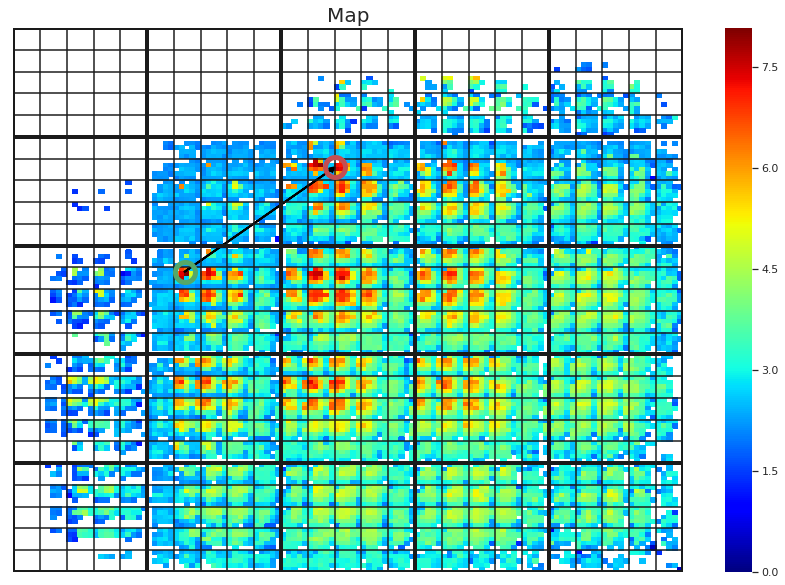

In [90]:
# present generated heat map
num_dims = 6 # dimensions of descriptor
bin_per_dim = 5 # bins in each descriptor
filename = "dcfnobc0608/rhex_text_2019-08-03_17_34_54_14007/archive_1800.dat" # text archive you want to present
coordsfilename = "samples.dat"

present_heatmap(num_dims, bin_per_dim, filename, coordsfilename, 
                fix_range = False, minimum = -2.51971, maximum = 8.07143,
               num_samples = 2)

Minscore found: 0
Maxscore found: 8.07143


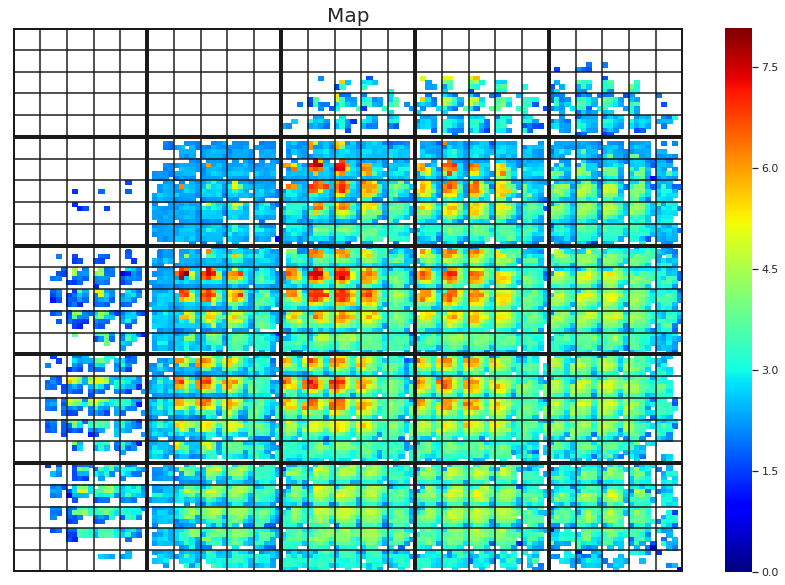

Minscore found: -0.848293
Maxscore found: 6.3801


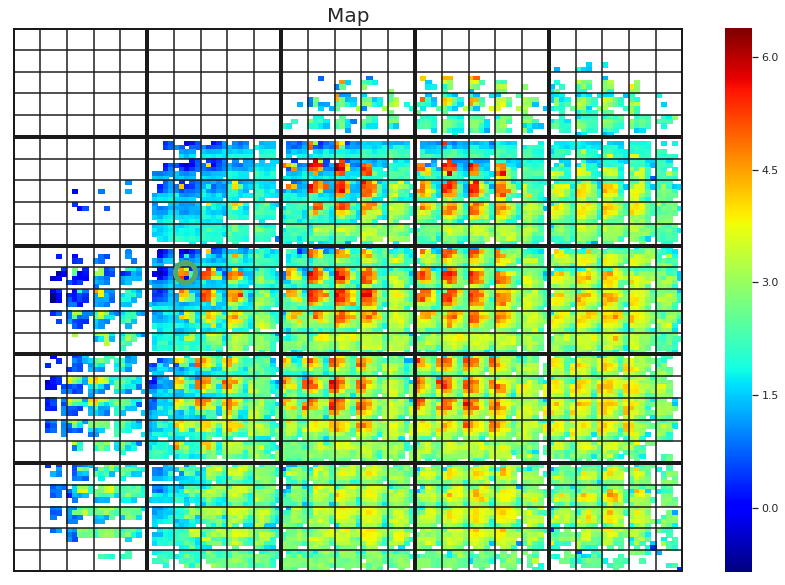

Minscore found: -2.57125
Maxscore found: 5.05705


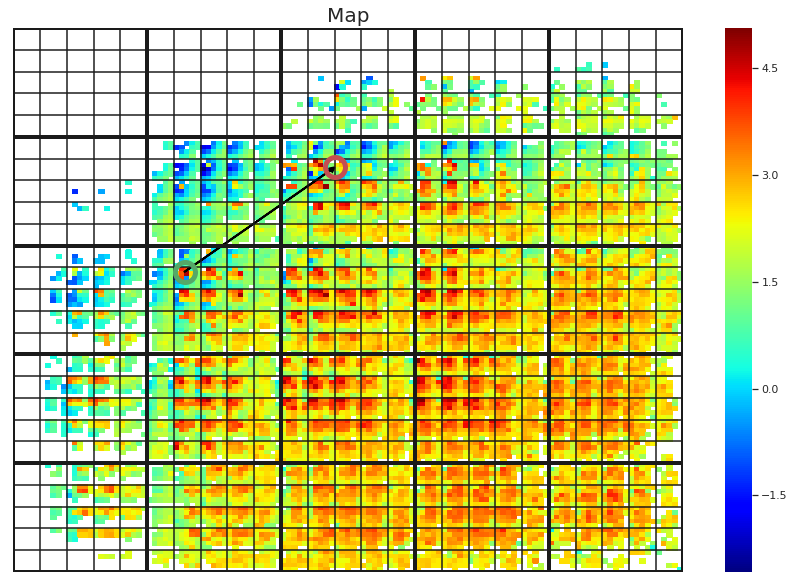

Minscore found: -2.53971
Maxscore found: 4.80266


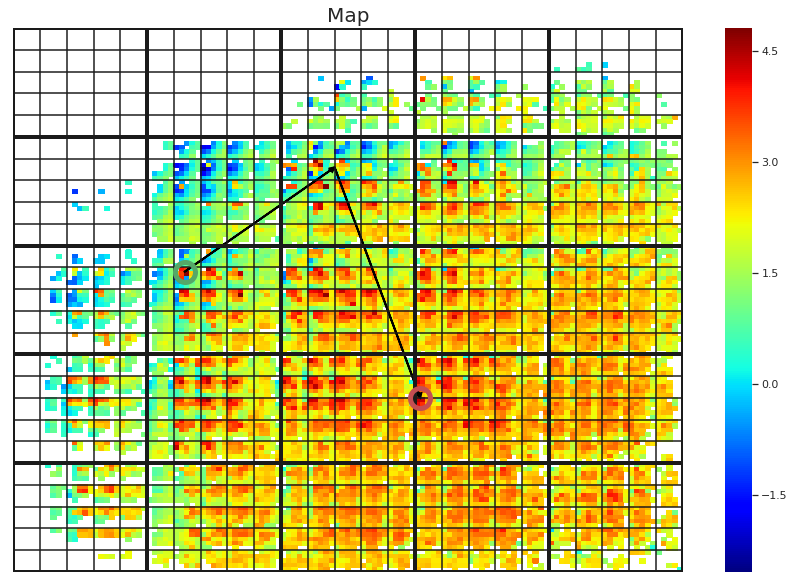

Minscore found: -2.51971
Maxscore found: 5.1497


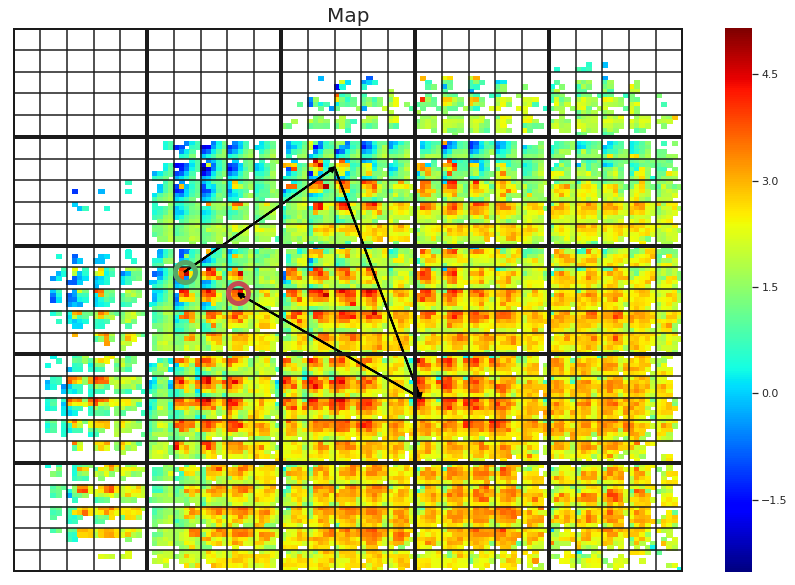

Minscore found: -2.51971
Maxscore found: 5.1497


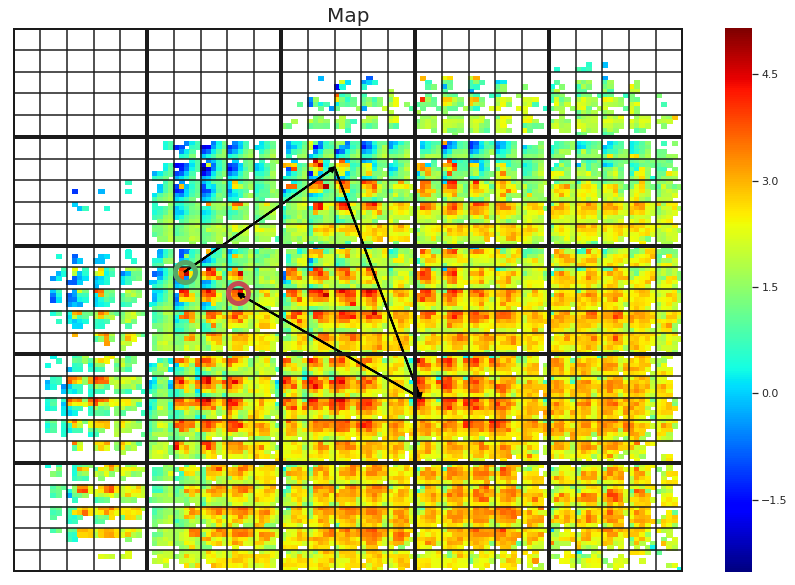

Minscore found: -2.51971
Maxscore found: 5.1497


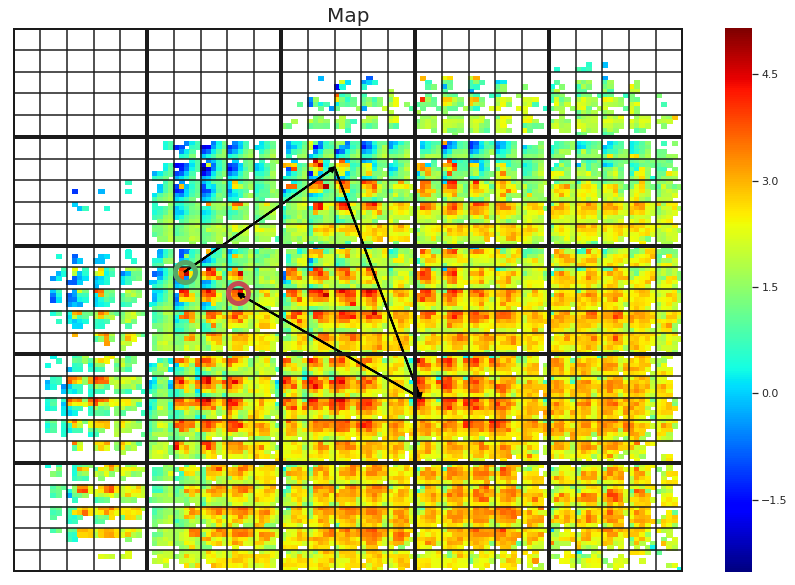

Minscore found: -2.51971
Maxscore found: 5.1497


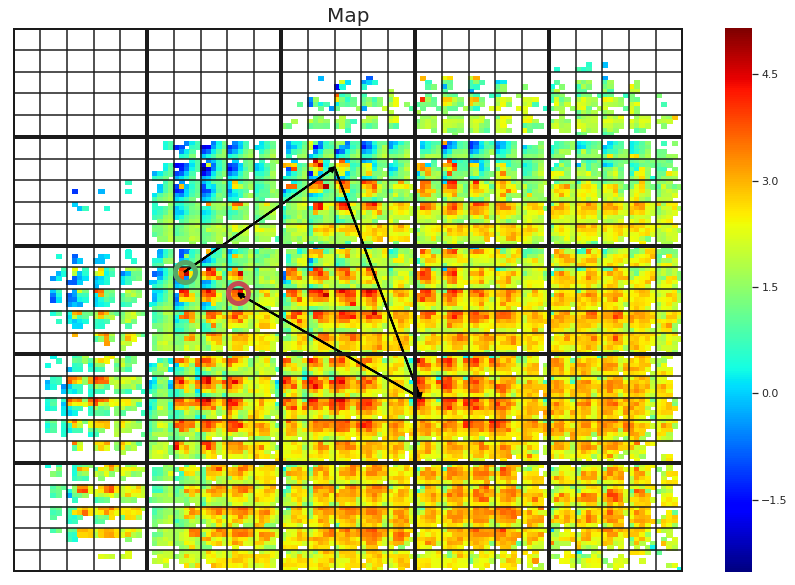

Minscore found: -2.51971
Maxscore found: 5.1497


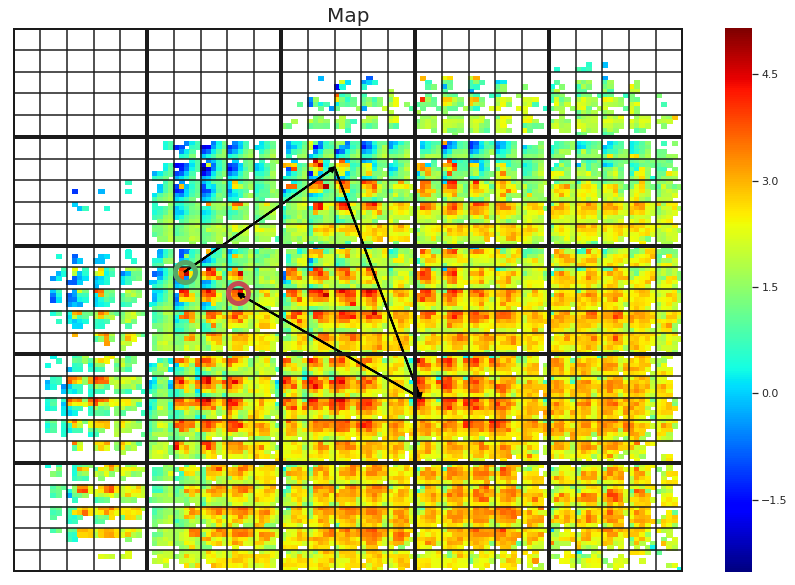

Minscore found: -2.51971
Maxscore found: 5.1497


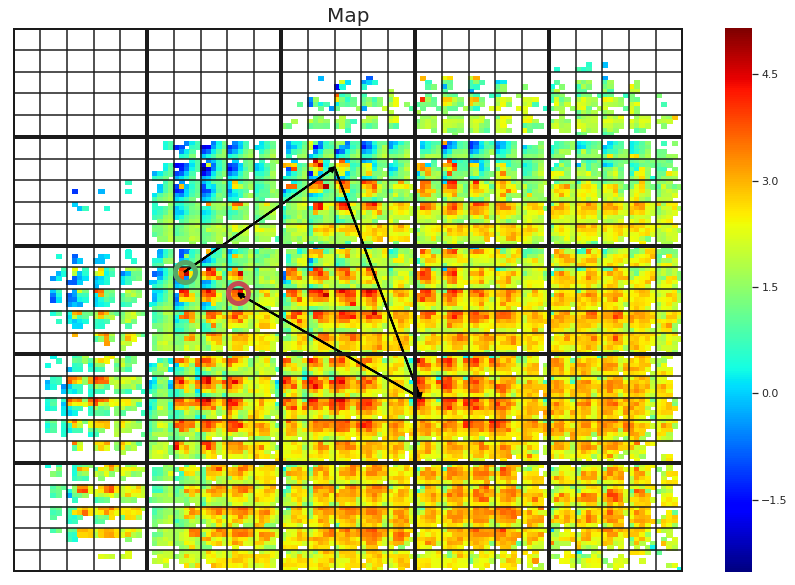

In [92]:
# given directory for iterative archives, present all the heatmaps one after the other
num_dims = 6 # dimensions of descriptor
bin_per_dim = 5 # bins in each descriptor
coordsfilename = "samples.dat"

for i in range(10):
    filename = "dcfnobc0608/iterations/gp_archive_" + str(i) + ".dat" # text archive you want to present
    present_heatmap(num_dims, bin_per_dim, filename, coordsfilename, gp_archive = True, 
                    fix_range = False, minimum = -2.51971, maximum = 8.07143,
                   num_samples = i)

In [31]:
for i in range(10):
    if i == 5:
        continue
    print(i)

0
1
2
3
4
6
7
8
9
